Let's start by importing all libs that we are going to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling


Now, we need to read the file and get in touch with what it's in there.

In [2]:
df = pd.read_csv('2004-2019.tsv',sep = '\t', index_col = 0)

In [3]:
df.head(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
DATA INICIAL                     106823 non-null object
DATA FINAL                       106823 non-null object
REGIÃO                           106823 non-null object
ESTADO                           106823 non-null object
PRODUTO                          106823 non-null object
NÚMERO DE POSTOS PESQUISADOS     106823 non-null int64
UNIDADE DE MEDIDA                106823 non-null object
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PREÇO MÍNIMO REVENDA             106823 non-null float64
PREÇO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             106823 non-null object
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         106823 non-null object
DESVIO PADRÃO DISTRIBUIÇÃO       106823 non-null object
PREÇO MÍNIMO DISTRIBUIÇÃO        106823 non-n

As we can see it would good to change the column name to a more appropriate one. Also, we have to dates that use the object type.

In [29]:
df.columns = ['begin_date', 'end_date', 'region', 'state', 'product', 
              'num_gas_stations', 'measure_unit', 'mean_resale_price',
             'std_resale_price', 'min_resale_price', 'max_resale_price',
             'mean_resale_margin', 'coef_resale_variation', 'mean_distribution_price',
             'std_distribution_price', 'min_distribution_price', 'max_distribution_price',
             'coef_distribution_variation', 'month', 'year']

df.columns.tolist()

['begin_date',
 'end_date',
 'region',
 'state',
 'product',
 'num_gas_stations',
 'measure_unit',
 'mean_resale_price',
 'std_resale_price',
 'min_resale_price',
 'max_resale_price',
 'mean_resale_margin',
 'coef_resale_variation',
 'mean_distribution_price',
 'std_distribution_price',
 'min_distribution_price',
 'max_distribution_price',
 'coef_distribution_variation',
 'month',
 'year']

All column names have been converted from portuguese to english. Next is step is to convert some types.

In [10]:
datetypes = ['begin_date','end_date']
for col in datetypes:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', exact = True)

numtypes = ['mean_resale_margin', 'mean_distribution_price', 'std_distribution_price', 
            'min_distribution_price', 'max_distribution_price', 'coef_distribution_variation']

for col in numtypes:
    df[col] = pd.to_numeric(df[col], errors = 'coerse')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
begin_date                     106823 non-null datetime64[ns]
end_date                       106823 non-null datetime64[ns]
region                         106823 non-null object
state                          106823 non-null object
product                        106823 non-null object
num_gas_stations               106823 non-null int64
measure_unit                   106823 non-null object
mean_resale_price              106823 non-null float64
std_resale_price               106823 non-null float64
min_resale_price               106823 non-null float64
max_resale_price               106823 non-null float64
mean_resale_margin             103392 non-null float64
coef_resale_variation          106823 non-null float64
mean_distribution_price        103423 non-null float64
std_distribution_price         103423 non-null float64
min_distribution_price         103423 non-null float64
m

In [30]:
df.head(5)

,begin_date,end_date,region,state,product,num_gas_stations,measure_unit,mean_resale_price,std_resale_price,min_resale_price,max_resale_price,mean_resale_margin,coef_resale_variation,mean_distribution_price,std_distribution_price,min_distribution_price,max_distribution_price,coef_distribution_variation,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004


Now that all types have been correctly set, we need to remove any missing value in the dataset.

In [18]:
#pd.DatetimeIndex(df['begin_date']).month

#df[pd.to_numeric(df['mean_resale_margin'],errors='coerse').isnull() == True].index
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103392 entries, 0 to 106822
Data columns (total 20 columns):
begin_date                     103392 non-null datetime64[ns]
end_date                       103392 non-null datetime64[ns]
region                         103392 non-null object
state                          103392 non-null object
product                        103392 non-null object
num_gas_stations               103392 non-null int64
measure_unit                   103392 non-null object
mean_resale_price              103392 non-null float64
std_resale_price               103392 non-null float64
min_resale_price               103392 non-null float64
max_resale_price               103392 non-null float64
mean_resale_margin             103392 non-null float64
coef_resale_variation          103392 non-null float64
mean_distribution_price        103392 non-null float64
std_distribution_price         103392 non-null float64
min_distribution_price         103392 non-null float64
m

As we can see, we lost some data due to some columns 

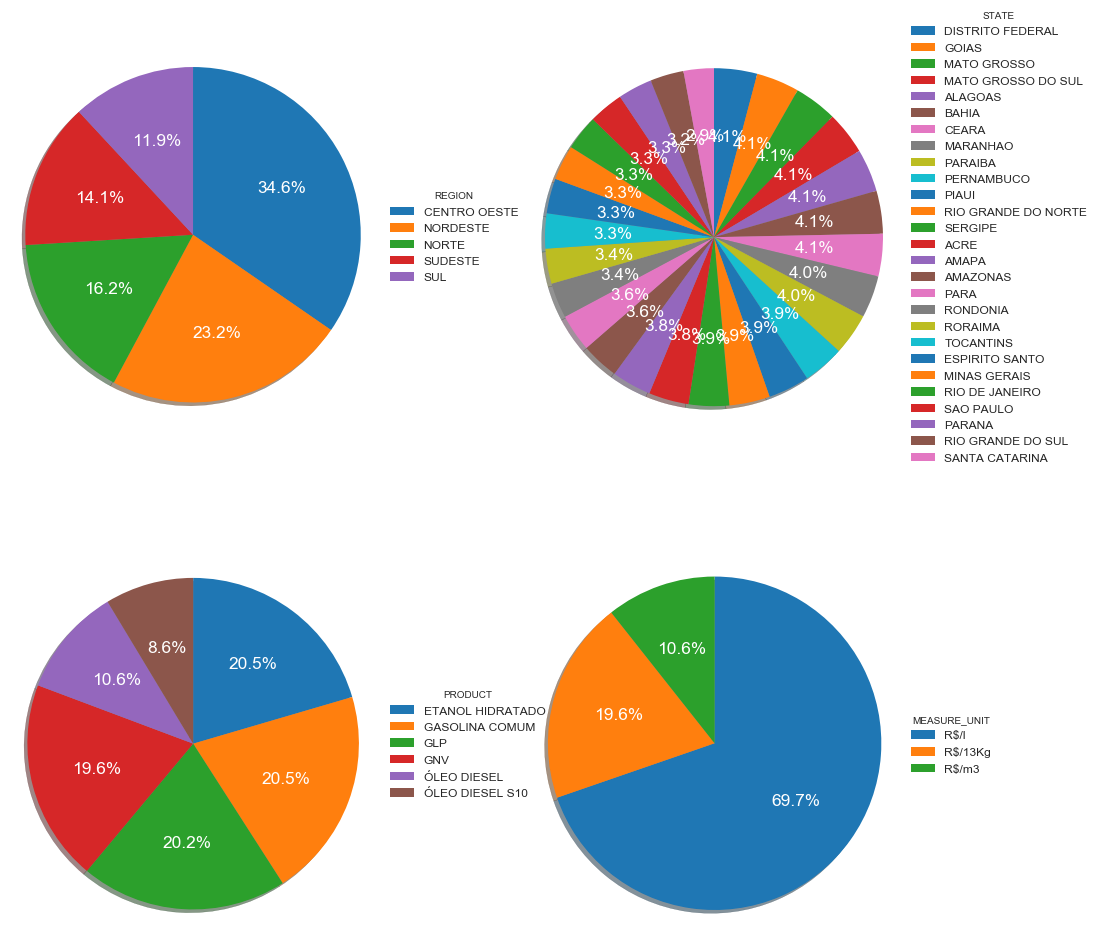

In [123]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

pltnames = ['region','state','product','measure_unit']

for i,name in enumerate(pltnames,start=1):
    ax = fig.add_subplot(2, 2, i)
    #ax.title(df[name].value_counts().name)
    wedges, texts, autotexts = ax.pie(df[name].value_counts().values, autopct='%1.1f%%',
        shadow=True, startangle=90, counterclock = False, textprops=dict(color="w",size = "xx-large"))
    ax.axis('equal')
    ax.legend(wedges, df[name].unique(),
          title=df[name].value_counts().name.upper(),
          loc="center left",
          bbox_to_anchor=(1, -.5, 2, 2),
          fontsize = 'large'
             )
    

plt.show()

In [20]:
df.isnull().sum().sum()

0

In [21]:
df.profile_report()

In [22]:
list(df.columns)

['begin_date',
 'end_date',
 'region',
 'state',
 'product',
 'num_gas_stations',
 'measure_unit',
 'mean_resale_price',
 'std_resale_price',
 'min_resale_price',
 'max_resale_price',
 'mean_resale_margin',
 'coef_resale_variation',
 'mean_distribution_price',
 'std_distribution_price',
 'min_distribution_price',
 'max_distribution_price',
 'coef_distribution_variation',
 'month',
 'year']

In the first two columns we can see begin date and end date. In last two columns we can see month and year, which is not really necessary since we can obtain those from the two first. Another intresting thing to observe is that it could be possible to have a begin date in a certain month and the end date in another month or even another year.

In [23]:
min(df['num_gas_stations'])

1

In [24]:
df['product'].unique().tolist()

['ETANOL HIDRATADO',
 'GASOLINA COMUM',
 'GLP',
 'GNV',
 'ÓLEO DIESEL',
 'ÓLEO DIESEL S10']

In [25]:
df['measure_unit'].unique().tolist()

['R$/l', 'R$/13Kg', 'R$/m3']

In [26]:
df[df['num_gas_stations'] >= 100].count()

begin_date                     55536
end_date                       55536
region                         55536
state                          55536
product                        55536
num_gas_stations               55536
measure_unit                   55536
mean_resale_price              55536
std_resale_price               55536
min_resale_price               55536
max_resale_price               55536
mean_resale_margin             55536
coef_resale_variation          55536
mean_distribution_price        55536
std_distribution_price         55536
min_distribution_price         55536
max_distribution_price         55536
coef_distribution_variation    55536
month                          55536
year                           55536
dtype: int64

In [27]:
print('Mean of gas station =  {:6.2f} and std = {:6.2f}'.format(df['num_gas_stations'].mean(), 
                                                      df['num_gas_stations'].std()))

Mean of gas station =  240.51 and std = 408.04


As we can see we have a good mean value, but a huge standard deviation in this case (almost twice as the mean value). Which means some gas stations should have a low quantity.